In [1]:
# coding: utf-8

import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import feature
import utils
import stitch
import constant as const

In [2]:
pool = mp.Pool(mp.cpu_count())

In [53]:
img_list, focal_length = utils.parse('../input_image/parrington')

In [54]:
print('Warp images to cylinder')
cylinder_img_list = pool.starmap(utils.cylindrical_projection, [(img_list[i], focal_length[i]) for i in range(len(img_list))])

Warp images to cylinder


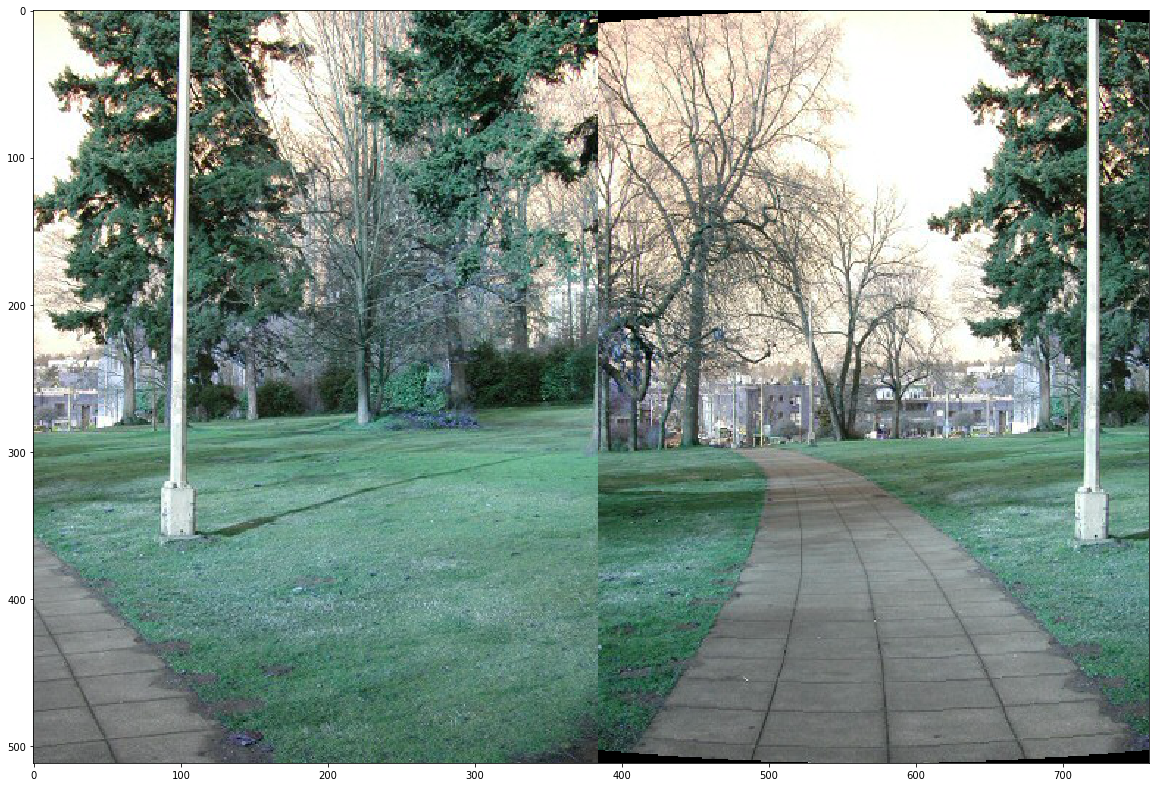

In [60]:
plt_img = np.concatenate((img_list[12], cylinder_img_list[13]), axis=1)
plt.figure(figsize=(20,20))
plt.imshow(plt_img)
plt.show()

In [61]:
img1 = cylinder_img_list[12]
img2 = cylinder_img_list[13]

print(' - Find features in img_1 .... ', end='', flush=True)
corner_response1 = feature.harris_corner(img1, pool)
descriptors1, position1 = feature.extract_description(img1, corner_response1, kernel=const.DESCRIPTOR_SIZE, threshold=const.FEATURE_THRESHOLD)
print(str(len(descriptors1))+' features extracted.')

print(' - Find features in img_2 .... ', end='', flush=True)
corner_response2 = feature.harris_corner(img2, pool)
descriptors2, position2 = feature.extract_description(img2, corner_response2, kernel=const.DESCRIPTOR_SIZE, threshold=const.FEATURE_THRESHOLD)
print(str(len(descriptors2))+' features extracted.')

 - Find features in img_1 .... 3802 features extracted.
 - Find features in img_2 .... 3976 features extracted.


 - Feature matching .... 119 features matched.


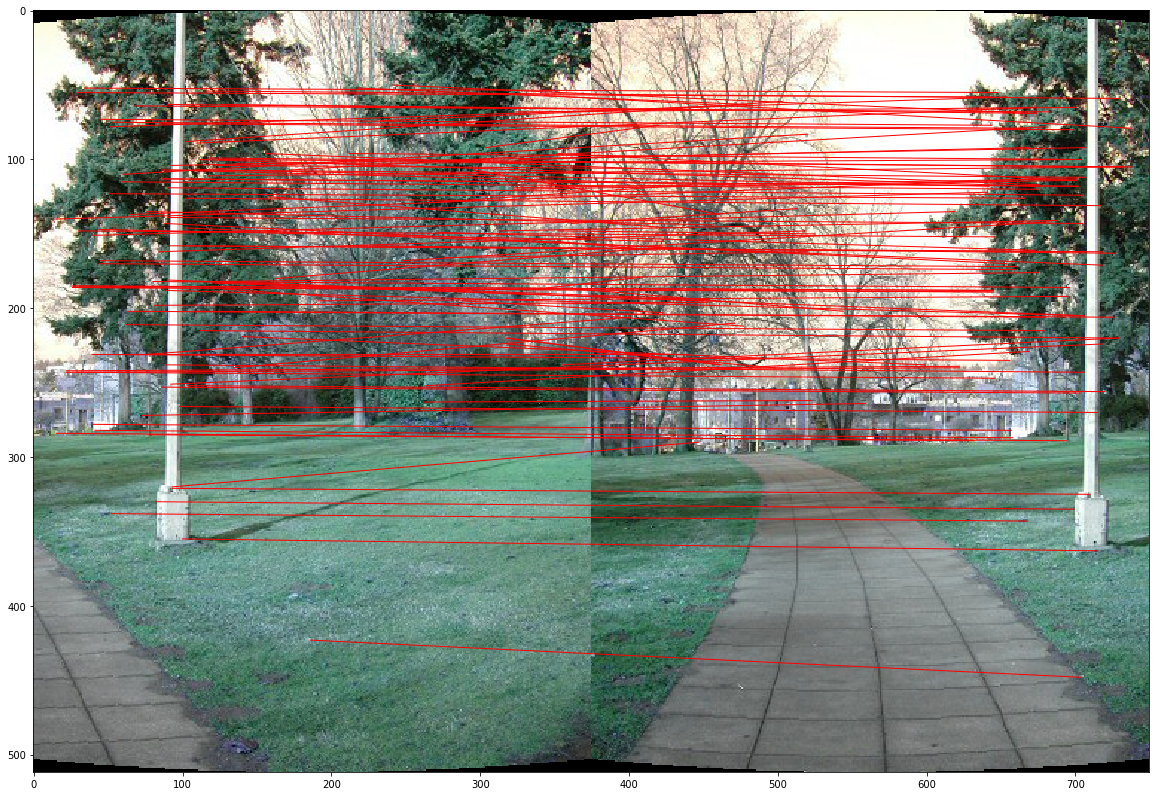

In [62]:
print(' - Feature matching .... ', end='', flush=True)
matched_pairs = feature.matching(descriptors1, descriptors2, position1, position2, pool, y_range=const.MATCHING_Y_RANGE)
print(str(len(matched_pairs)) +' features matched.')

utils.matched_pairs_plot(img1, img2, matched_pairs)

In [63]:
print(' - Find best shift using RANSAC .... ', end='', flush=True)
shift = stitch.RANSAC(matched_pairs, [0, 0])
print('best shift ', shift)

 - Find best shift using RANSAC .... best shift  [  4 240]


 - Stitching image .... 

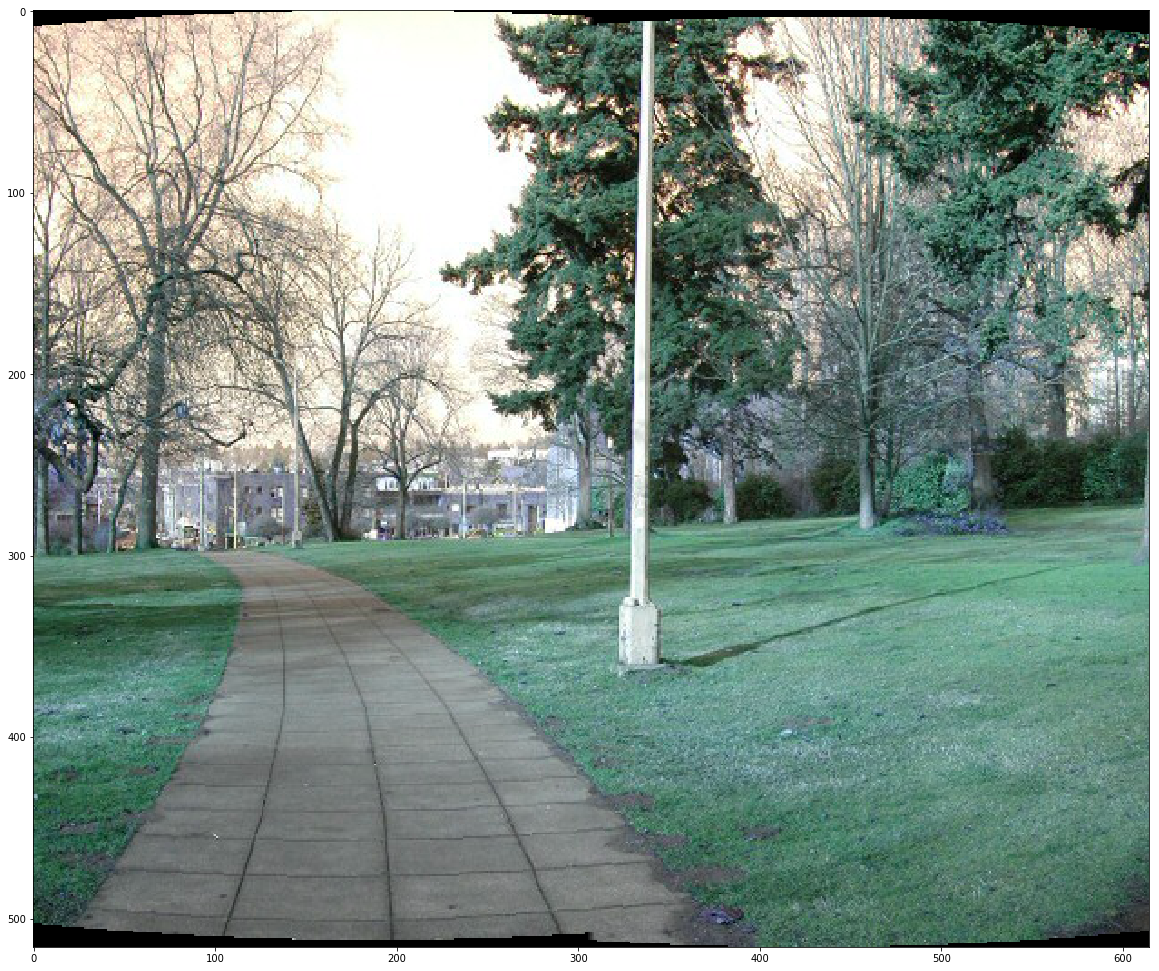

In [64]:
print(' - Stitching image .... ', end='', flush=True)
stitched_image = stitch.stitching(img1, img2, shift, pool, blending=True)
plt.figure(figsize=(20,20))
plt.imshow(stitched_image)
plt.show()

In [65]:
cv2.imwrite('10.JPG', stitched_image)

True

Perform end to end alignment
Cropping image


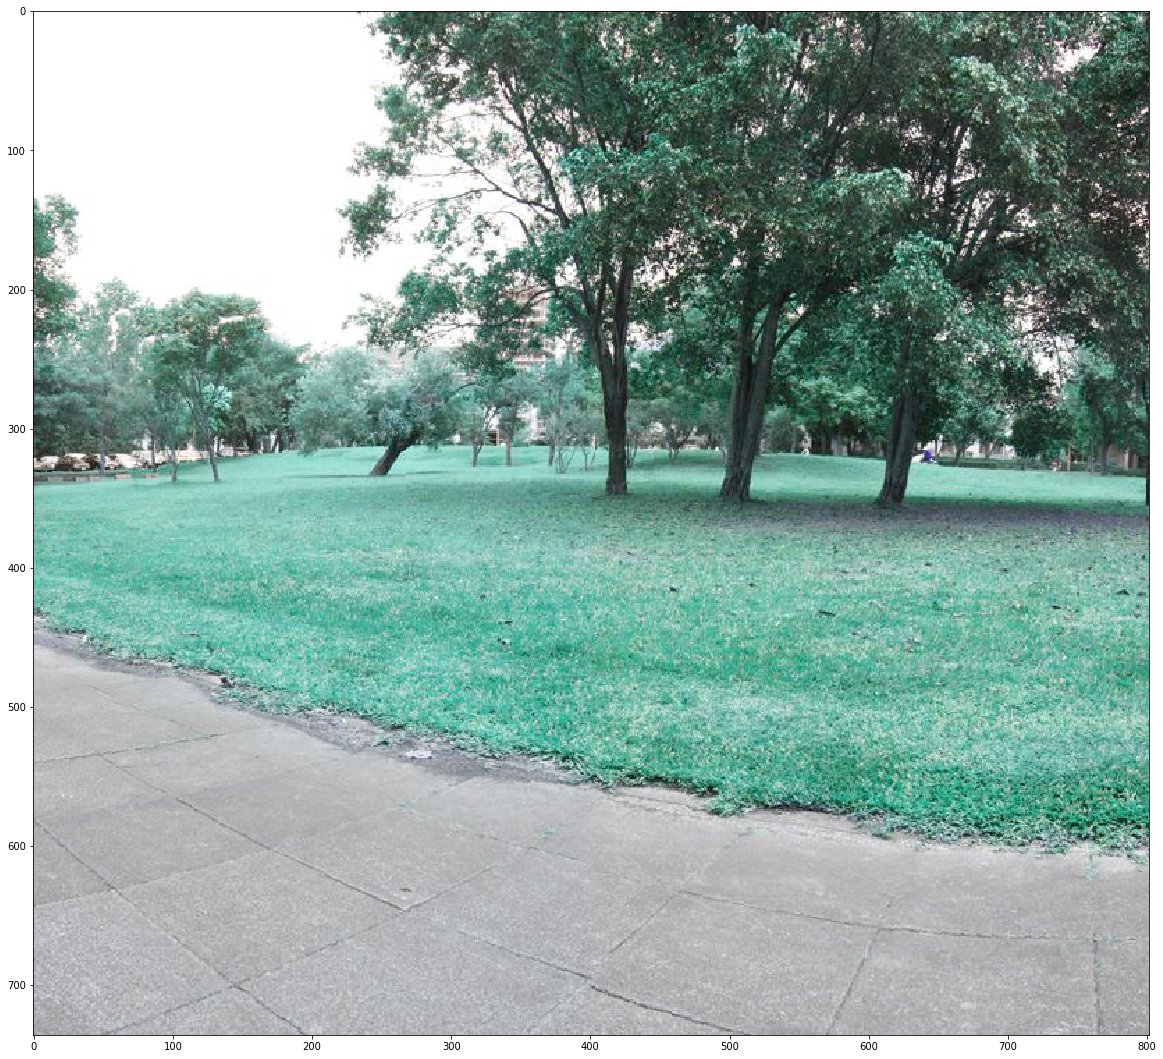

In [22]:
print('Perform end to end alignment')
aligned = stitch.end2end_align(stitched_image, [shift])

print('Cropping image')
cropped = stitch.crop(aligned)
plt.figure(figsize=(20,20))
plt.imshow(cropped)
plt.show()